In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_hospitals = pd.read_csv("../Data/train.csv")

In [4]:
dataset_hospitals

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),?,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No


Here we can see that the readmitted_binary doesn't always align with the readmitted_multiclass, even if the readmitted_multiclass is different from "No" we can see that the readmitted_binary is still "No" in those cases.

In [5]:
dataset_hospitals.shape

(71236, 31)

The dataset contains 31 attributes and 71236 records, each attribute being a feature analysed for every encounter had with a patient, representing each row.

In [6]:
dataset_hospitals.dtypes

encounter_id                              int64
country                                  object
patient_id                                int64
race                                     object
gender                                   object
age                                      object
weight                                   object
payer_code                               object
outpatient_visits_in_previous_year        int64
emergency_visits_in_previous_year         int64
inpatient_visits_in_previous_year         int64
admission_type                           object
medical_specialty                        object
average_pulse_bpm                         int64
discharge_disposition                    object
admission_source                         object
length_of_stay_in_hospital                int64
number_lab_tests                          int64
non_lab_procedures                        int64
number_of_medications                     int64
primary_diagnosis                       

In [17]:
dataset_hospitals.columns

Index(['encounter_id', 'country', 'patient_id', 'race', 'gender', 'age',
       'weight', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')

Seeing the data types of the attributes show us what we can already simplify as, for example, binary variables like: change_in_meds_during_hospitalization, which has the values "No" or "Ch"; prescribed_diabetes_meds	which has values "Yes" or "No".

In [7]:
dataset_hospitals.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      3554
gender                                       0
age                                       3557
weight                                       0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_dia

In [8]:
dataset_hospitals.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71236.0,NaN,NaN,NaN,548798.623716,259704.723154,100000.0,323118.5,548370.0,774058.5,999980.0
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0


Between the mean and the 50% quantile there's no much difference which doesn't indicate a possibility of outliers in these (...) parameters.

In [9]:
dataset_hospitals.replace("?", np.nan, inplace=True)

In [10]:
dataset_hospitals.isna().sum() # o numero de nans aumentou o que significa que tinhamos features a "?"

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_dia

In [14]:
dataset_hospitals["change_in_meds_during_hospitalization"] = dataset_hospitals["change_in_meds_during_hospitalization"].replace({"No":0, "Ch":1})
dataset_hospitals["prescribed_diabetes_meds"] = dataset_hospitals["prescribed_diabetes_meds"].replace({"No":0, "Yes":1})

In [15]:
dataset_hospitals

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,276,466,8,NaN,NaN,0,0,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,785,162,9,NaN,NaN,0,1,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,135,250,6,NaN,NaN,1,1,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,562,455,5,NaN,NaN,0,0,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,599,428,9,NaN,NaN,0,0,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),NaN,MC,0,1,...,786,250,9,NaN,>7,1,1,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,...,197,V66,6,NaN,>7,1,1,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),NaN,NaN,0,2,...,491,276,9,>300,NaN,1,1,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),NaN,BC,0,0,...,157,250.8,5,NaN,NaN,1,1,"['glyburide', 'insulin']",No,No


In [16]:
dataset_hospitals.admission_type

0        Emergency
1        Emergency
2              NaN
3        Emergency
4         Elective
           ...    
71231     Elective
71232       Urgent
71233          NaN
71234    Emergency
71235       Urgent
Name: admission_type, Length: 71236, dtype: object

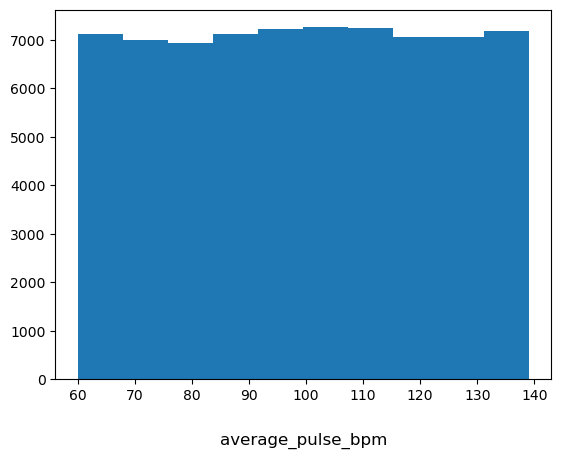

In [20]:
plt.hist(dataset_hospitals["average_pulse_bpm"], bins=10)
plt.title("average_pulse_bpm", y=-0.2)

plt.show()

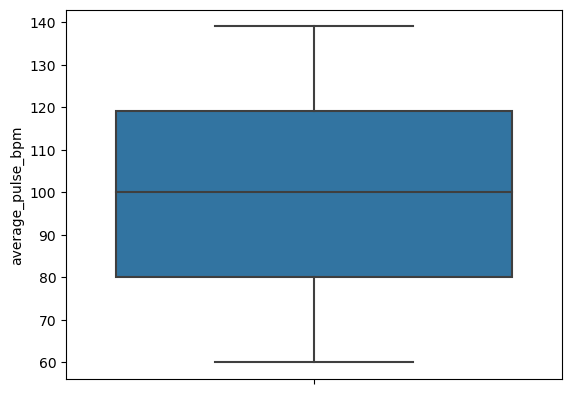

In [22]:
# Single Metric Variable Box Plot
sns.boxplot(y=dataset_hospitals["average_pulse_bpm"])

plt.show()